/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (693, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


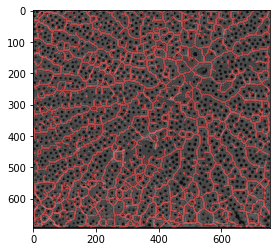

In [12]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild018.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.42) 

In [13]:
from PIL import Image
im=Image.open('cropped_Wild018.tif')
width, height=im.size

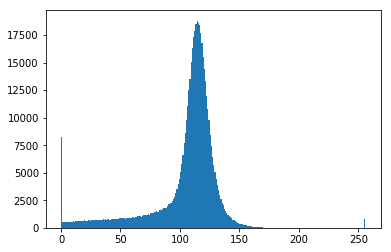

103.92325107842349

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild018.tif',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

np.mean(img)

In [15]:
partialstd=(np.std(img)/2)
lower=np.mean(img)-partialstd
print("lower =",lower)
upper=np.mean(img)+partialstd
print("upper =",upper)

lower = 88.92784751997469
upper = 118.91865463687229


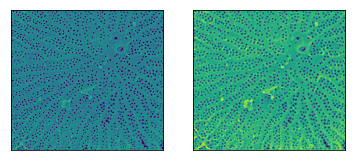

(693, 754)

In [16]:
blur = cv2.blur(img,(5, 5))
plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.show()
np.shape(blur)

<PIL.Image.Image image mode=P size=754x693 at 0x1C296E5128>


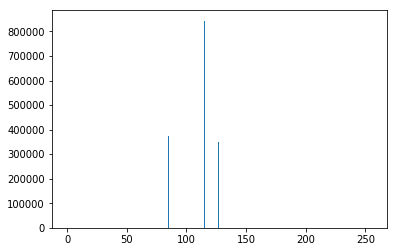

[[[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [115 115 115]
  [115 115 115]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [115 115 115]]

 [[115 115 115]
  [115 115 115]
  [ 85  85  85]
  ...
  [127 127 127]
  [115 115 115]
  [115 115 115]]

 ...

 [[ 85  85  85]
  [ 85  85  85]
  [ 85  85  85]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[ 85  85  85]
  [ 85  85  85]
  [ 85  85  85]
  ...
  [ 85  85  85]
  [ 85  85  85]
  [ 85  85  85]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]]


In [17]:
image=im.quantize(3,0)
image.save('simple_Wild018.tif')
print(image)
newimg = cv2.imread('simple_Wild018.tif')
plt.hist(newimg.ravel(),256,[0,255]); plt.show()
print(newimg)

/Users/3kh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/3kh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
/Users/3kh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


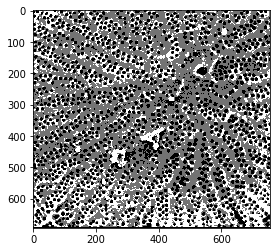

In [23]:
newimg[np.where(newimg == [127])] = [255]
newimg[np.where(newimg == [85])] = [0]
newimg[np.where(newimg == [])] = [0]
newimg[np.where(newimg == [])] = [0]
newimg[np.where(newimg == [])] = [0]
plt.imshow(newimg, cmap='gray')

In [24]:
from skimage.filters import threshold_otsu
th=threshold_otsu(newimg)
print(th)
np.shape(newimg)

115


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (693, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))


(693, 754, 3)

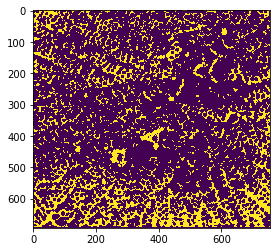

In [25]:
threshold = newimg[:,:,0] > th
plt.imshow(threshold)

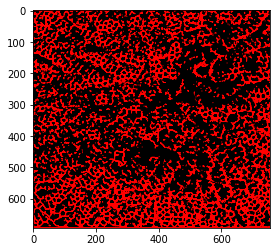

In [26]:
from skimage.morphology import skeletonize
skeleton = skeletonize(threshold)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')